# Exploratory Data Analysis
We will begin by cleaning our data and performing some basic classification.

In [14]:
# some useful mysklearn package import statements and reloads
import importlib

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

# uncomment once you paste your mypytable.py into mysklearn package
import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MySimpleLinearRegressor, MyNaiveBayesClassifier, MyZeroRClassifier, MyRandomClassifier, MyDecisionTreeClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

from tabulate import tabulate

## Frequency Diagrams
First, we will look at the frequecy of data in some of the key nominal columns.

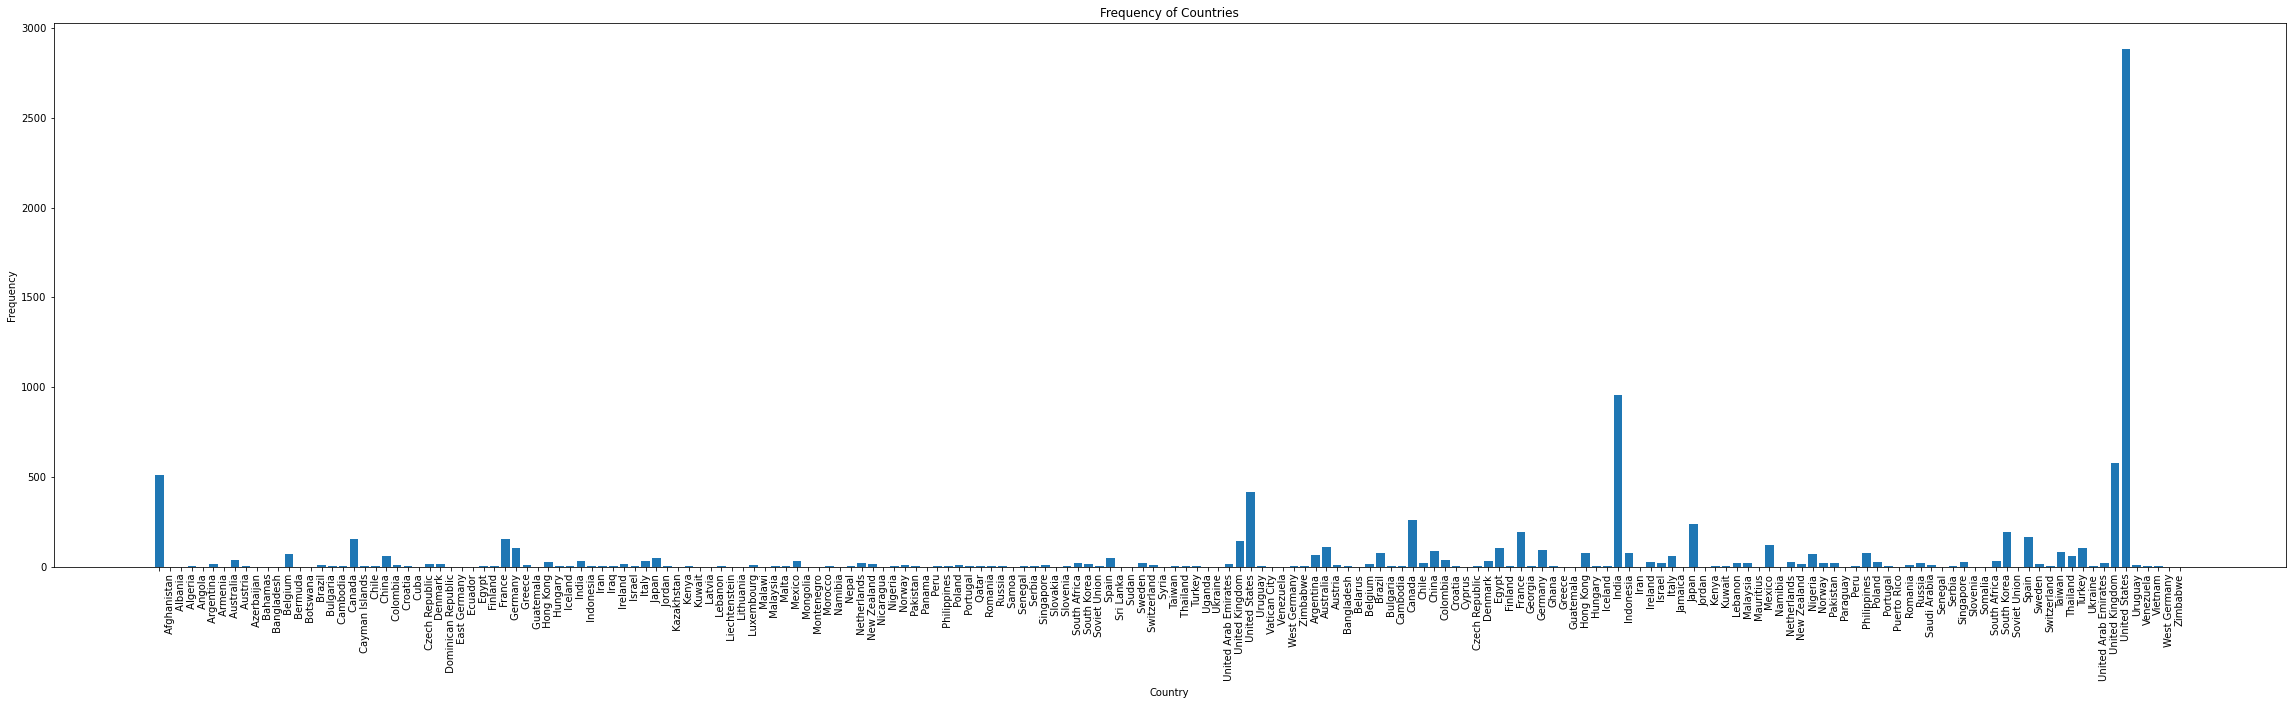

In [15]:
movies_table = myutils.load_data("netflix_titles.csv")
combined_countries = movies_table.get_column("country")
countries = myutils.parse_multiple_values(combined_countries)
country_freq = myutils.count_frequency(countries)
myutils.frequency_diagram(country_freq, "Frequency of Countries", "Country", "Frequency")


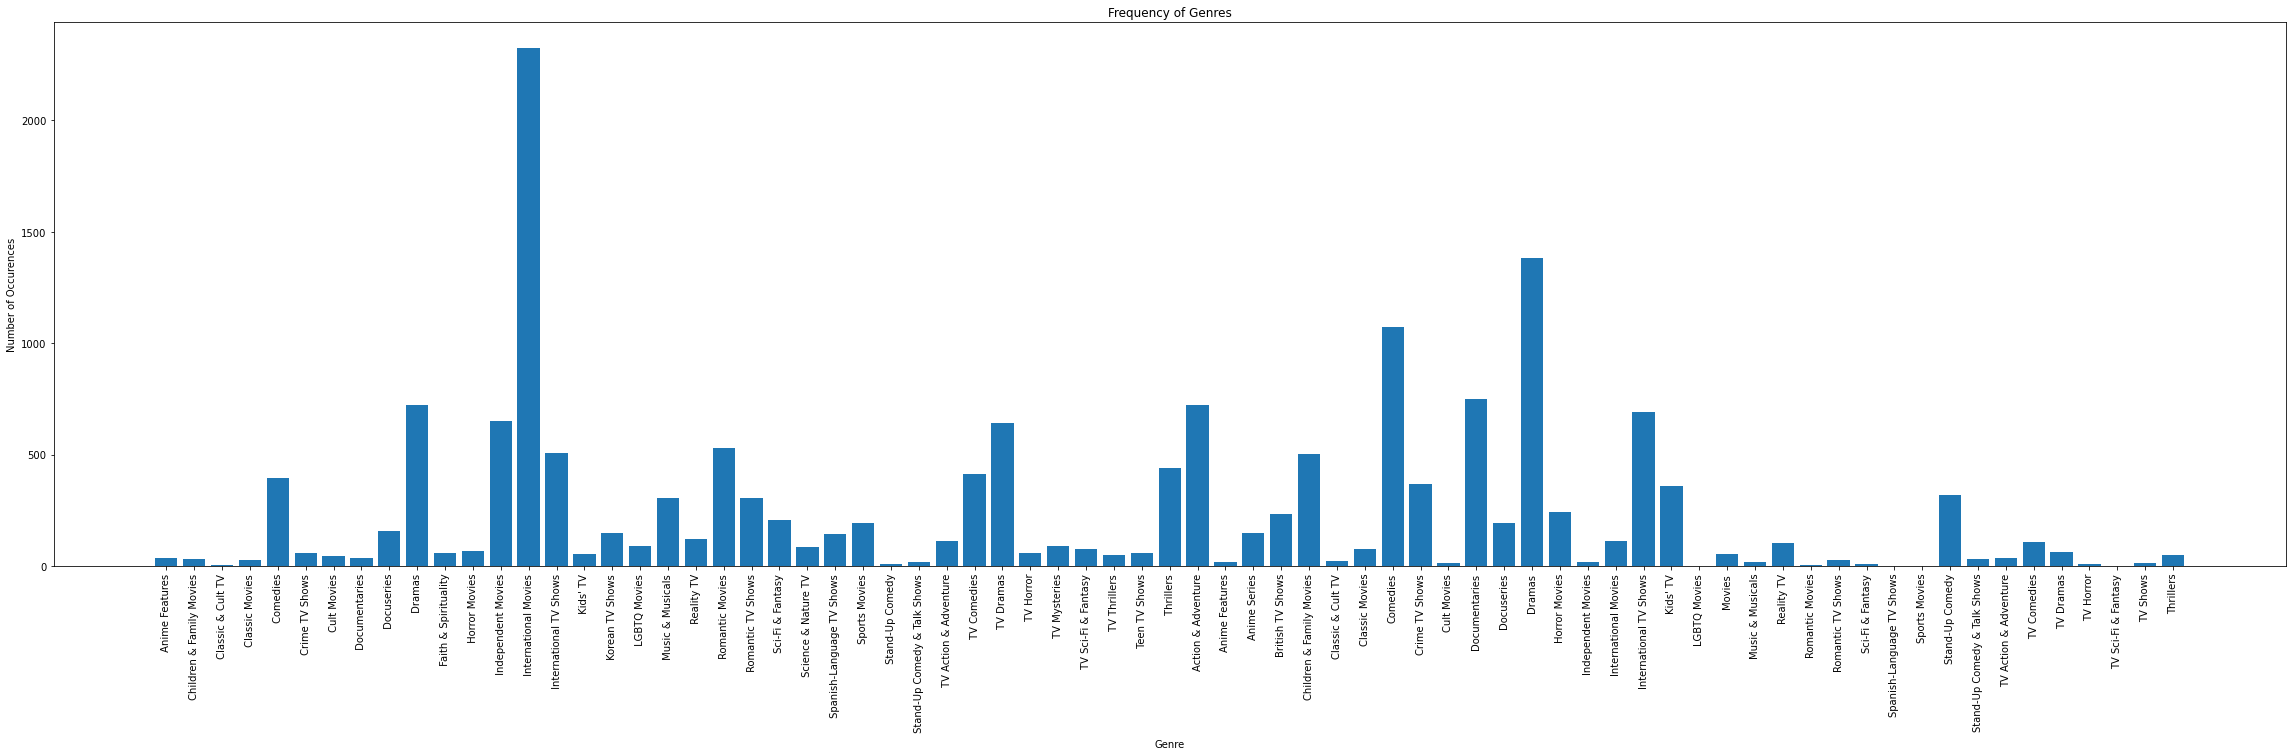

In [16]:
combined_genres = movies_table.get_column("listed_in")
genres = myutils.parse_multiple_values(combined_genres)
genre_freq = myutils.count_frequency(genres)
myutils.frequency_diagram(genre_freq, "Frequency of Genres", "Genre", "Number of Occurences")

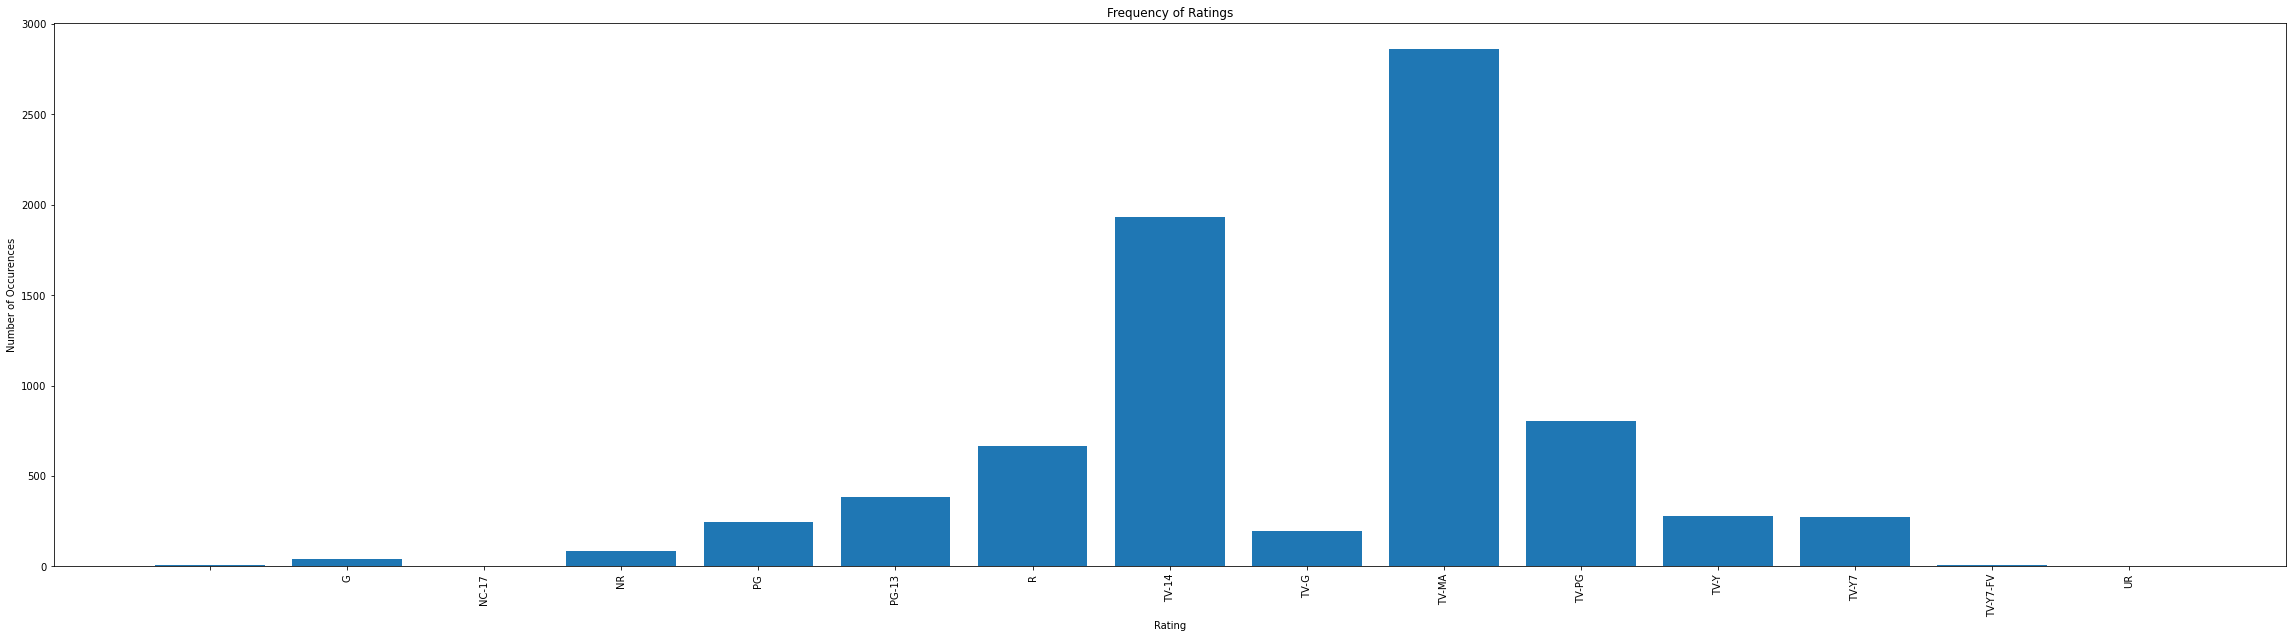

In [17]:
ratings_freq = myutils.count_column_frequencies(movies_table, "rating")
myutils.frequency_diagram(ratings_freq, "Frequency of Ratings", "Rating", "Number of Occurences")

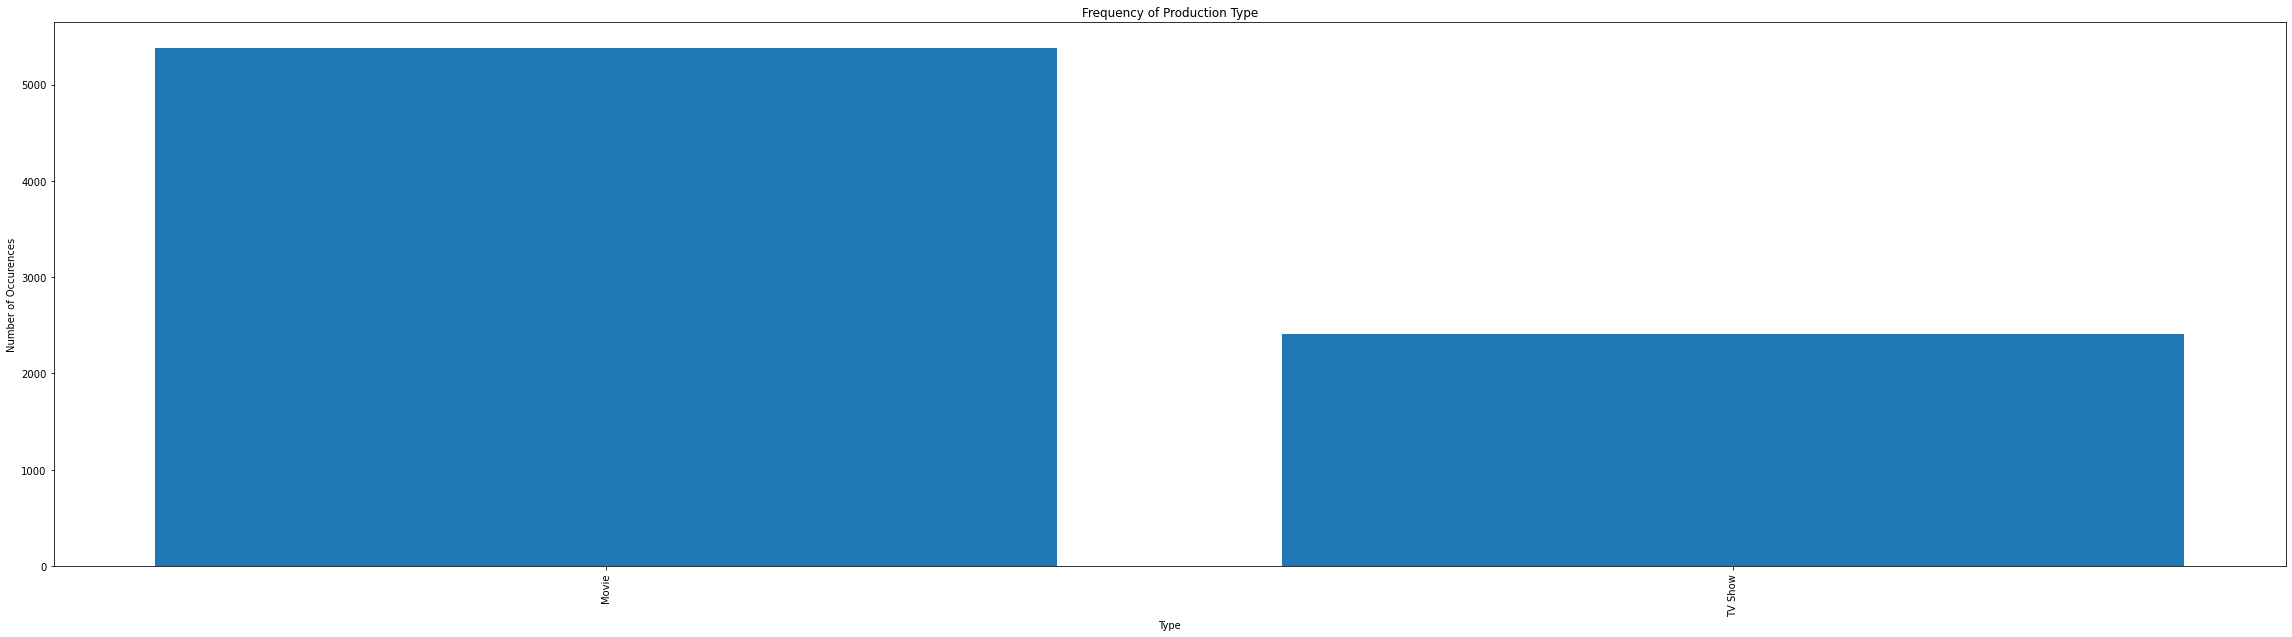

In [19]:
type_freq = myutils.count_column_frequencies(movies_table, "type")
myutils.frequency_diagram(type_freq, "Frequency of Production Type", "Type", "Number of Occurences")

## Preliminary Classification